# Individual Station Heatmaps
#### The purpose of this notebook is to create heatmaps for our 10 key stations, indicating total entries and exits per station based on day of the week and time of day.

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
mta = pd.read_csv('mta_clean.zip', parse_dates=['date', 'timestamp'], low_memory=False)
mta['total_div_six'] = mta['total']/6

After importing the csv, we created a column called "time_period" to use as the y axis for the heatmaps. We created a function to break the data into 6 equal four-hour time periods.

In [4]:
def timeperiod(time):
    time = dt.datetime.strptime(time, '%H:%M:%S').time()
    if time >= dt.time(0,0,0) and time < dt.time(4,0,0):
        return "12am-4am"
    elif time >= dt.time(4,0,0) and time < dt.time(8,0,0):
        return "4am-8am"
    elif time >= dt.time(8,0,0) and time < dt.time(12,0,0):
        return "8am-12pm"
    elif time >= dt.time(12,0,0) and time < dt.time(16,0,0):
        return "12pm-4pm"    
    elif time >= dt.time(16,0,0) and time < dt.time(20,0,0):
        return "4pm-8pm"    
    else:
        return "8pm-12am"
    
mta['time_period'] = mta['time'].apply(timeperiod)  

In [5]:
mta.head()

,station,turnstile,ca,unit,scp,linename,num_lines,division,desc,date,time,timestamp,weekday,entries,exits,total,total_div_six,time_period
0,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,04:00:00,2019-08-03 04:00:00,Saturday,0.0,10.0,10.0,1.666667,4am-8am
1,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,08:00:00,2019-08-03 08:00:00,Saturday,0.0,7.0,7.0,1.166667,8am-12pm
2,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,12:00:00,2019-08-03 12:00:00,Saturday,0.0,10.0,10.0,1.666667,12pm-4pm
3,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,16:00:00,2019-08-03 16:00:00,Saturday,0.0,12.0,12.0,2.000000,4pm-8pm
4,1 AV,1 AV-H007-R248-00-00-00,H007,R248,00-00-00,L,1,BMT,REGULAR,2019-08-03,20:00:00,2019-08-03 20:00:00,Saturday,0.0,11.0,11.0,1.833333,8pm-12am


You now see a "time_period" column at the end. We also created a "total_div_six" column since we are looking at six weeks of data, and we want the heatmap numbers to reflect a single week instead of the sum of all six.

We then created heatmaps for each station, with the 6 newly created time periods ("time_period") as the y axis and the 7 days of the week ("weekday") as the x axis.

Text(0.5, 1.0, '14th Street')

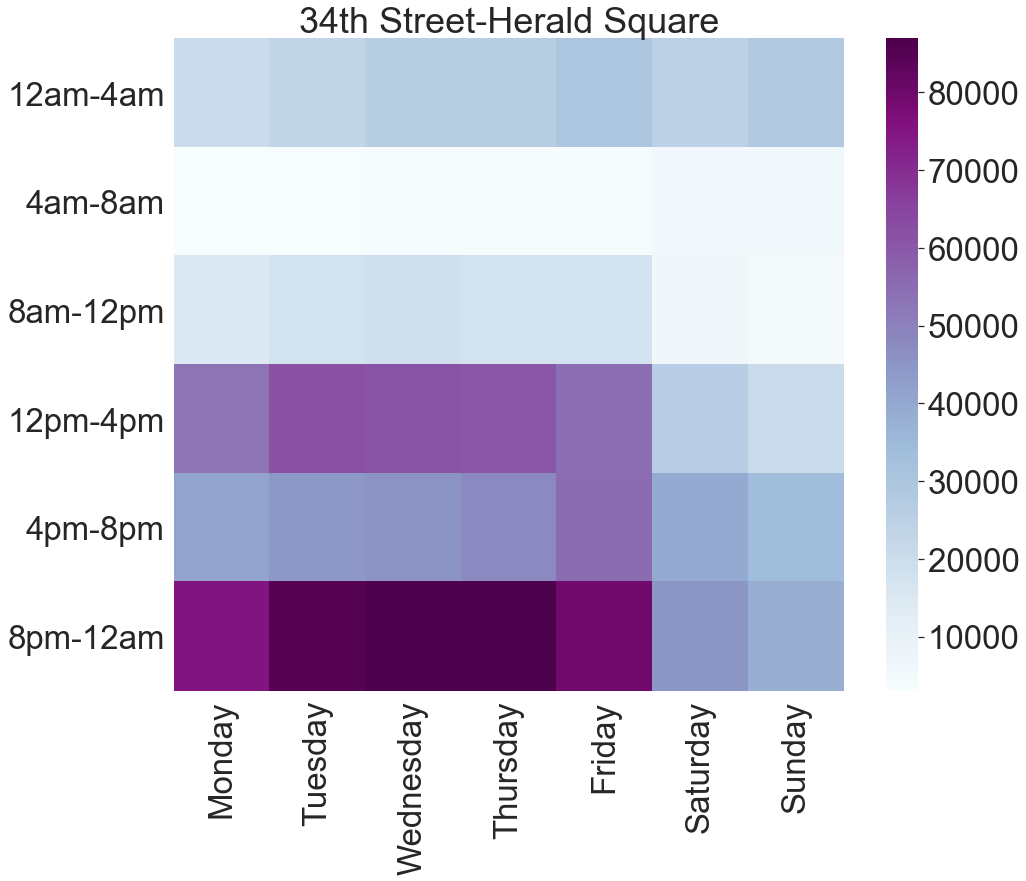

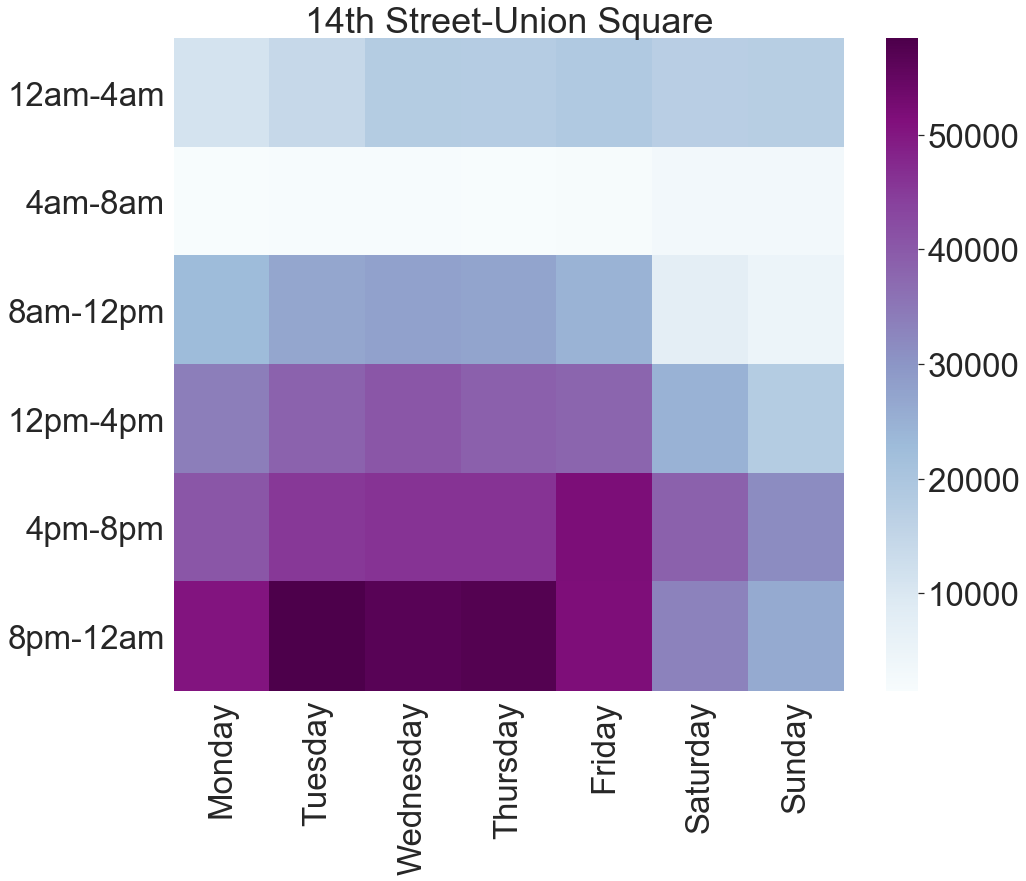

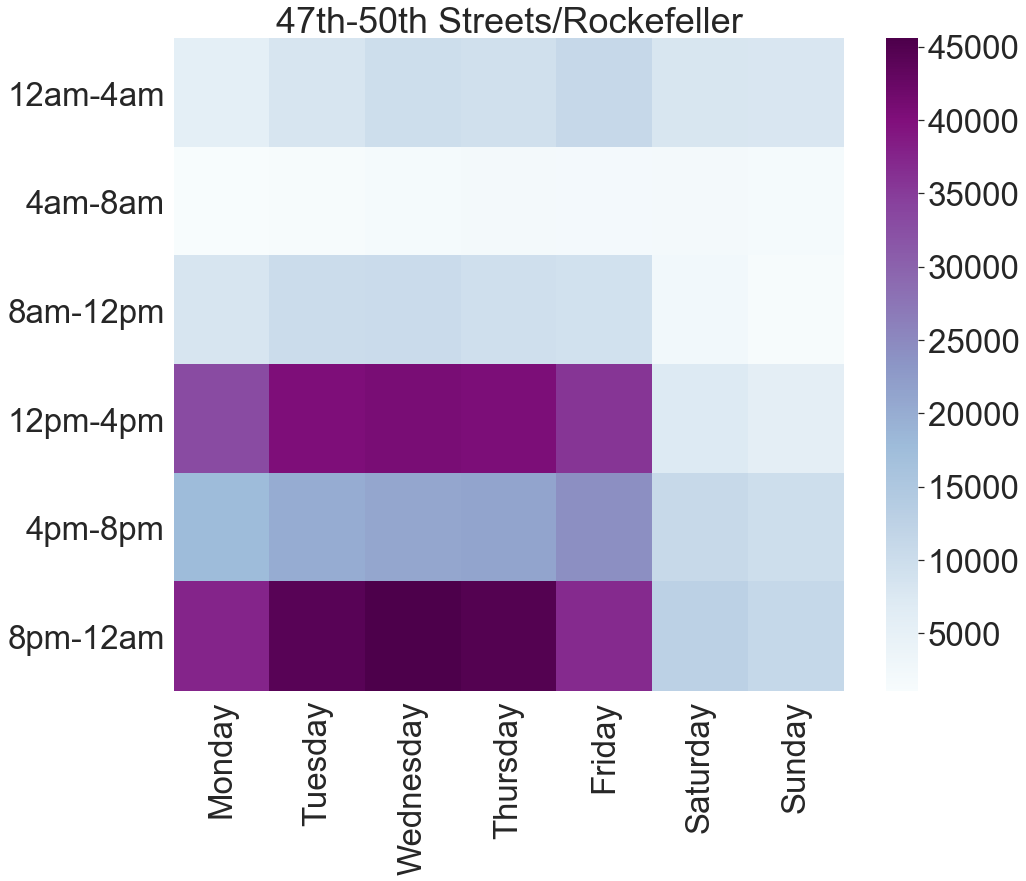

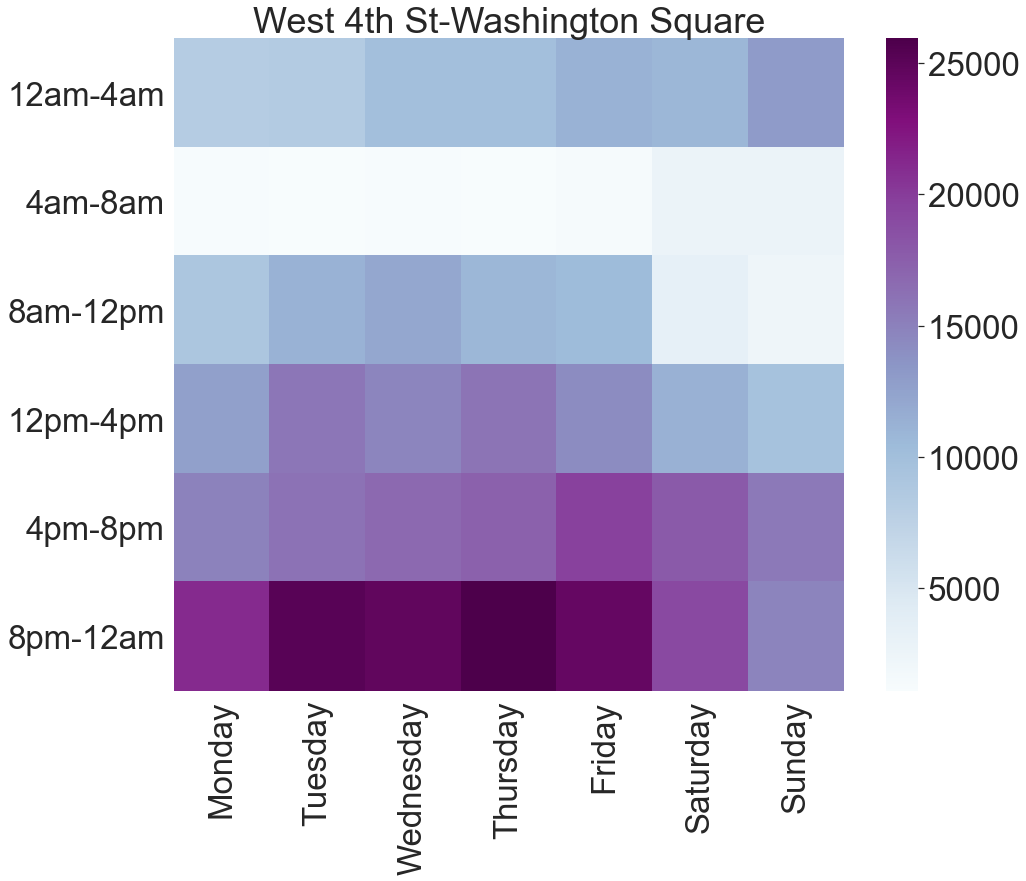

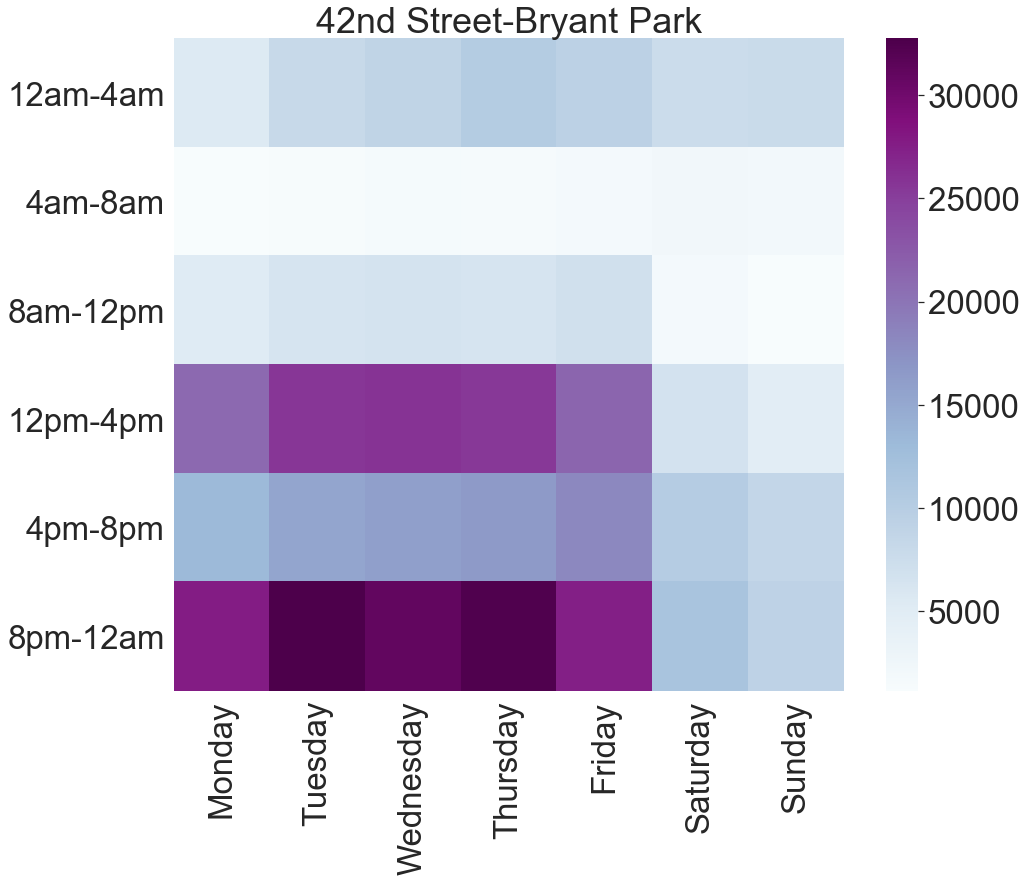

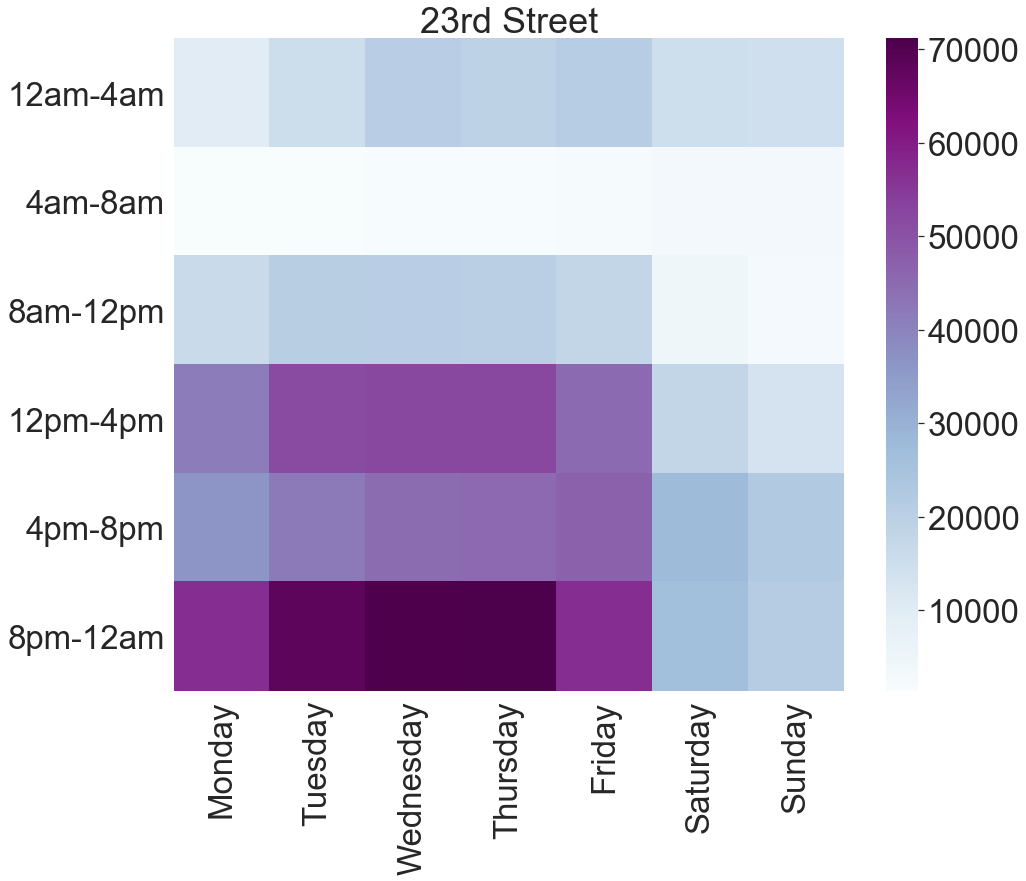

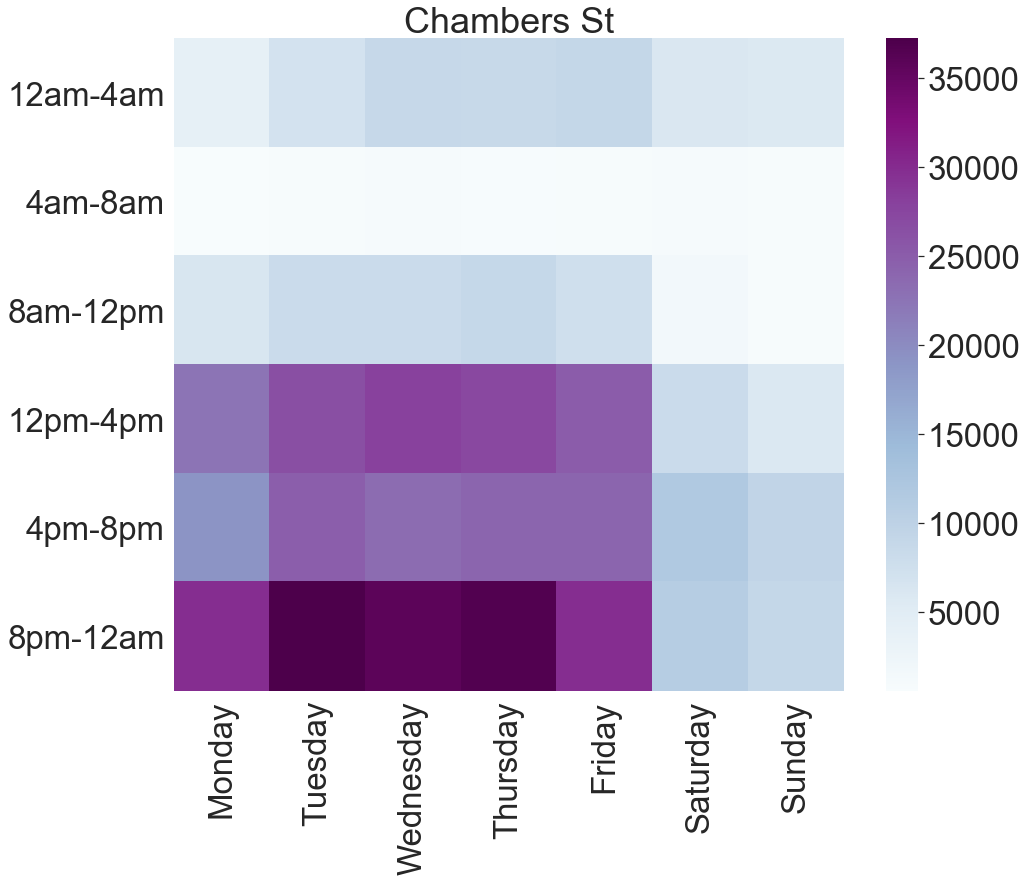

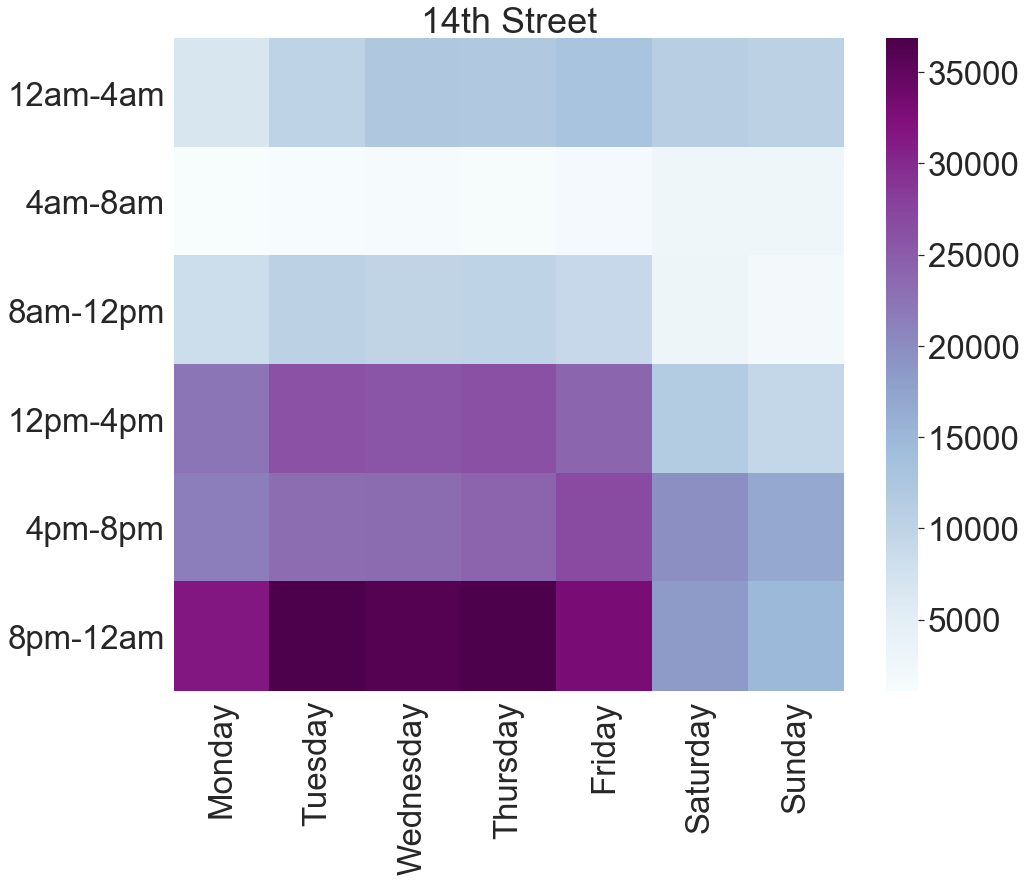

In [6]:
sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '34 ST-HERALD SQ'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('34th Street-Herald Square')


sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '14 ST-UNION SQ'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('14th Street-Union Square')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '47-50 STS ROCK'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('47th-50th Streets/Rockefeller')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == 'W 4 ST-WASH SQ'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('West 4th St-Washington Square')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '42 ST-BRYANT PK'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('42nd Street-Bryant Park')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '23 ST'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('23rd Street')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == 'CHAMBERS ST'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('Chambers St')

sns.set(font_scale = 3)

station_heatplot = mta[mta['station'] == '14 ST'].groupby(['time_period','weekday'])['total_div_six'].sum()
station_heatplot = station_heatplot.unstack()
station_heatplot.reset_index()
station_heatplot = station_heatplot.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
station_heatplot = station_heatplot.reindex(index=["12am-4am","4am-8am","8am-12pm","12pm-4pm","4pm-8pm","8pm-12am"])

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

sns.set_style("white")
sns.heatmap(station_heatplot,cmap='BuPu');

ax.set_ylabel('')    
ax.set_xlabel('')

plt.title('14th Street')